# Defining Problem Statement and Analysing basic metrics 

Analysing the Netflix CSV file to gain insights and 
extract basic metrics to better understand the content and 
user behaviour on the platform. The goal is to understand the data and 
identify key trends, patterns related to the content available on Netflix 
and the user engagement with that content.

Analysing basic metrics 
Before analysing the data, we get some information about dataset as follows,

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('netflix.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Insight as follows:
The Above dataset contains information about Show_id, movies, 
TV shows, director, Cast, Country, date_added, release_year, 
rating, duration, listed_in (genres) and description

# Analysing basic metrics 

Titles by Genre:
Un-nesting the listed_in columns
Un-nest the listed_in columns those have cells with multiple genre comma separated values 

# Titles by Genre:

In [41]:
# Creating seperarte lines for each genre in a movie
var1 = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new1 = pd.DataFrame(var1,index=df['title'])
df_new1 = df_new1.stack()
df_new1 = pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Genre'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1

,title,Genre
0,Sankofa,Dramas
1,Sankofa,Independent Movies
2,Sankofa,International Movies
3,The Great British Baking Show,British TV Shows
4,The Great British Baking Show,Reality TV
...,...,...
11853,Zoom,Children & Family Movies
11854,Zoom,Comedies
11855,Zubaan,Dramas
11856,Zubaan,International Movies


In [44]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Above dataframe you see NaN value present, so we are going to eliminate the null value from above dataframe.
Before removing the NaN value you can see the shape of dataframe.

# Removing NAN value

In [45]:
df.shape

(8807, 12)

In [38]:
# Removing the NaN value
pd.isnull(df)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,False,False,False,False,False,False,False,False,False,False,False,False
8802,False,False,False,False,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
pd.isnull(df).sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [36]:
df.dropna(inplace=True)

In [35]:
df.shape

(5332, 12)

Null value eliminated from dataframe

# Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

shape of data

In [10]:
df.shape

(5332, 12)

data types of all the attributes

In [11]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Removing the missing value 

In [12]:
pd.isnull(df)
pd.isnull(df).sum()
df.dropna(inplace=True)
df.shape

(5332, 12)

Statistical summary (Numeric Column): Below code will give you information about statistics like count, mean, standard deviation, minimum, 25th percentile (1st quartile), 50th percentile (median or 2nd quartile), 75th percentile (3rd quartile), and maximum.
Only for Numeric column release_year.

In [13]:
df.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


Statistical summary (Object Column)

In [14]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,5332,5332,5332,5332,5332,5332,5332,5332,5332,5332,5332
unique,5332,2,5332,3945,5200,604,1453,14,198,335,5321
top,s8,Movie,Sankofa,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",TV-MA,94 min,"Dramas, International Movies",When pretty new neighbor Seema falls for their...
freq,1,5185,1,18,10,1846,92,1822,135,336,2


Non-Graphical Analysis: Value counts and unique attributes

Value counts: Counting all the genre present in the above dataset

In [15]:
df_new1['Genre'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

Insight from below data : Top 5 Genre & top 5 country in Netflix dataset

In [47]:
top_5_genre = df_new1['Genre'].value_counts().head()
print(top_5_genre)

print('***************************************')
top_5_country = df['country'].value_counts().head()
print(top_5_country)

International Movies    2369
Dramas                  2293
Comedies                1553
Action & Adventure       806
Independent Movies       740
Name: Genre, dtype: int64
***************************************
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64


unique attributes : Analysis is used to identify the distinct values present in a specific column. 
    This is particularly helpful when dealing with categorical or nominal data, as it helps you understand the 
    range of categories or unique entries within the column
    Country listed in netflix dataset

In [22]:
df['country'].unique()

array(['United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'United States', 'Germany, Czech Republic',
       'India', 'United States, India, France',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Japan', 'Nigeria',
       'Spain, United States', 'United Kingdom, United States',
       'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Canada', 'Hong Kong', 'United States, China, Hong Kong',
       'Italy, United States', 'United States, Germany', 'France',
       'United Kingdom, Canada, United States',
  

# Visual Analysis - Univariate, Bivariate after pre-processing of the data

For continuous variable(s): Distplot, countplot, histogram for univariate analysis

countplot : Top 5 Genre in netflix data set as follows

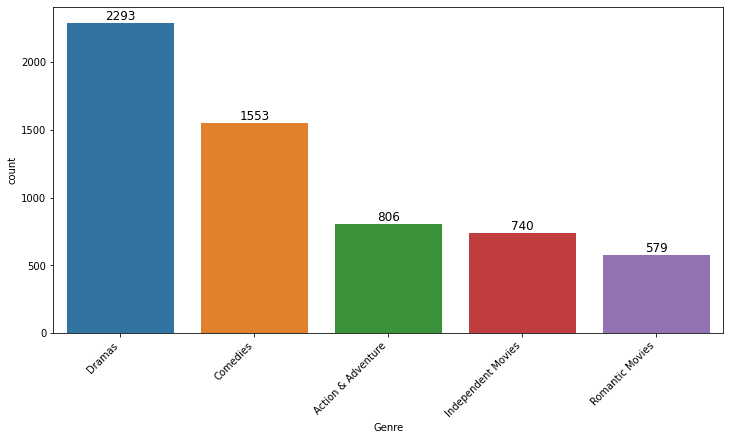

Dramas                2293
Comedies              1553
Action & Adventure     806
Independent Movies     740
Romantic Movies        579
Name: Genre, dtype: int64


In [51]:
import seaborn as sns

df_IN1 = df_new1[df_new1['Genre'] != 'International Movies']

top_5_genre = df_IN1['Genre'].value_counts().head()
top_5_genre_index = df_IN1['Genre'].value_counts().head().index
x_bar = top_5_genre_index
y_bar = top_5_genre
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Genre',data = df_IN1,order=top_5_genre_index)
# plt.xticks(rotation=90)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),ha='center', va='bottom', fontsize=12)
plt.show()
print(top_5_genre)

In the above analysis i have removed the International Movies from genre since it is not a genre
and analysing the top 5 genre.

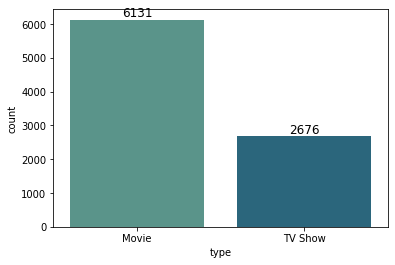

In [50]:
ax = sns.countplot(x ='type', data = df, palette="crest")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),ha='center', va='bottom', fontsize=12)
plt.show()

Number of movies is approximately twice the number of tv shows

histogram : As we are moving forward with refernce to years more movies and shows are released.

<Axes: xlabel='release_year', ylabel='Count'>

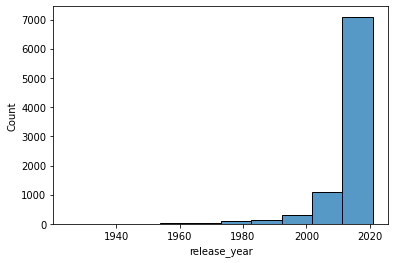

In [48]:
sns.histplot(df["release_year"], bins=10)

C:\Users\Rathik\AppData\Local\Temp\ipykernel_19500\2351381156.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['release_year'], bins=20, kde=True)


<Axes: xlabel='release_year', ylabel='Density'>

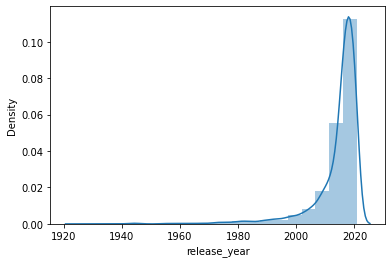

In [49]:
sns.distplot(df['release_year'], bins=20, kde=True)

# For categorical variable(s): Boxplot

In [73]:
pd.isnull(df)
pd.isnull(df).sum()
df.dropna(inplace=True)
df['actors'] = df['cast'].apply(lambda x: x.split(', ') if not pd.isna(x) else [])
df.drop(columns='cast', inplace=True)

In [74]:
df['actors']

7       [Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...
8       [Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...
9       [Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...
12      [Luna Wedler, Jannis Niewöhner, Milan Peschel,...
24      [Prashanth, Aishwarya Rai Bachchan, Sri Lakshm...
                              ...                        
8801    [Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,...
8802    [Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...
8804    [Jesse Eisenberg, Woody Harrelson, Emma Stone,...
8805    [Tim Allen, Courteney Cox, Chevy Chase, Kate M...
8806    [Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...
Name: actors, Length: 5332, dtype: object

In [75]:
df['country'] = df['country'].str.split(',')
df_country = df.explode('country')
df_country['country'] = df_country['country'].apply(lambda x: x.strip())
IND_data = df_country[df_country["country"] == "India"]
IND_data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,actors
24,s25,Movie,Jeans,S. Shankar,India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,"[Prashanth, Aishwarya Rai Bachchan, Sri Lakshm..."
29,s30,Movie,Paranoia,Robert Luketic,India,"September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...","[Liam Hemsworth, Gary Oldman, Amber Heard, Har..."
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,"[Antony Varghese, Reshma Rajan, Binny Rinky Be..."
114,s115,Movie,Anjaam,Rahul Rawail,India,"September 2, 2021",1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...,"[Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, J..."
116,s117,Movie,Dhanak,Nagesh Kukunoor,India,"September 2, 2021",2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,"[Krrish Chhabria, Hetal Gada, Vipin Sharma, Gu..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,India,"May 1, 2017",2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ...","[Dharmendra, Sunny Deol, Bobby Deol, Neha Shar..."
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,India,"January 1, 2018",2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,"[Ankush Choudhary, Smita Shewale, Mohan Joshi,..."
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,"[Adil Hussain, Mona Singh, K.K. Raina, Sanjay ..."
8799,s8800,Movie,Zenda,Avadhoot Gupte,India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,"[Santosh Juvekar, Siddharth Chandekar, Sachit ..."


In [76]:
IND_data = IND_data.explode('actors')
top_10_IND_actors = IND_data["actors"].value_counts(normalize=True).head(10).index.to_list()
top_10_IND_data = IND_data[IND_data["actors"].isin(top_10_IND_actors)]
top_10_IND_actors

['Anupam Kher',
 'Shah Rukh Khan',
 'Naseeruddin Shah',
 'Om Puri',
 'Akshay Kumar',
 'Amitabh Bachchan',
 'Paresh Rawal',
 'Boman Irani',
 'Kareena Kapoor',
 'Ajay Devgn']

<Axes: xlabel='type'>

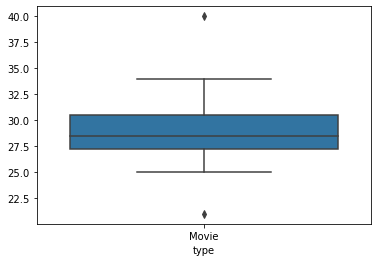

In [77]:
IND_data_pvt = top_10_IND_data.pivot_table(index="actors", columns="type", values="rating", aggfunc="count", fill_value=0)
sns.boxplot(IND_data_pvt)

India is second in producing movies
India is producing more movies compared to TV shows

# 4.3 For correlation: Heatmaps

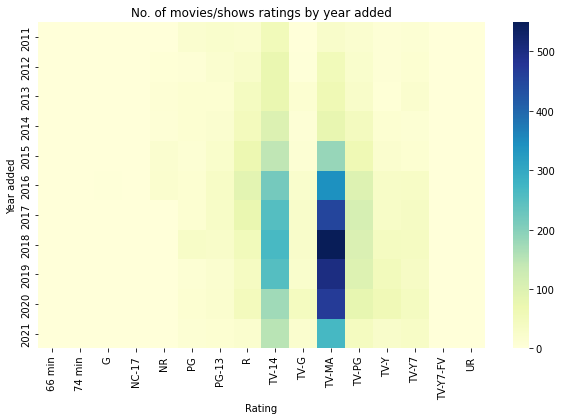

In [53]:
heatmap_data = df[df['release_year']>=2011].pivot_table(index='release_year', columns='rating',values='type', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data,  cmap='YlGnBu', cbar=True)
plt.title('No. of movies/shows ratings by year added')
plt.xlabel('Rating')
plt.ylabel('Year added')
plt.show()

# From the above heat map we can infer that TV-MA, TV-14 rated movies/shows are more available.

# Missing Value & Outlier check 

1) Removed NAN value values from give netflix data frame
2) Removed International Movies from genre list as the internatinal movie cannot be consider as genre

#  Insights based on Non-Graphical and Visual Analysis

Insights based on Non-Graphical
1) With help of .info we can understand the datatypes of different columns
2) Top 5 Genre {Dramas,Comedies,Action & Adventure,Independent Movies,Romantic Movies} this is most preferable genre for year 1940to2020
3) Top 5 Country {United States,India,United Kingdom,Japan,South Korea} that makes and release the shows on netflix
4) Top 10 India Actors in Netflix dataset {Anupam Kher,Shah Rukh Khan,Naseeruddin Shah,Om Puri,Akshay Kumar,Amitabh Bachchan,Paresh Rawal,Boman Irani,Kareena Kapoor,Ajay Devgn}

Insights based on Visual Analysis 
And till 2020 data from netflix dataset
1) Number of Movies is approximately twice the number of TV shows
2) As we are moving forward with refernce to years more movies and shows are released in 2020
3) India is second in producing most movies & also producing more movies compared to TV shows.

# Business Insights

1) Most popular genres among users are Dramas,Comedies,Action & Adventure,Independent Movies,Romantic Movies,this can guide content acquisition and production decisions. This insight helps to understand this type of content attracts more viewers.
2) In Indian market people prefer more movies compare to TV shows.
3) But mostly international movies are preferred in all the other countries.

# Recommendations

1) With refer to Heatmap the target Audience age should be above 17+ 
2) So we should focus on college students and provide them subscription discounts
3) People prefer mature content so according to that most of the content should be released
4) India is the second highest market and still the open market for netflix
5) People like to watch Dramas and Comedies contents